# Decision Trees, Logistic Regression and Naive Bayes Implimentation

## 1.Data Prepration

In [10]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Import the dataset in Python as Pandas dataframe and examine the data structure using pandas dataframe's head method.

In [11]:
# Import database into pandas and examine first few records
data = pd.read_csv('CustomerchurnData.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Examine the shape of the dataframe, its column headings and data type for each column

In [12]:
data.shape

(7043, 21)

In [13]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [15]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'], errors='coerce')

In [16]:
Churn = {'Yes': 1,'No': 0}
data.Churn = [Churn[i] for i in data.Churn]
data['Churn'] = data['Churn'].astype(int)

In [17]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [18]:
data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [19]:
# Check missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null int32
dtypes: float64(2), int32(1), int

In [20]:
data['TotalCharges'].isnull().sum()

11

In [21]:
#impute missing values with mode
for col in ['TotalCharges']:
    data[col].fillna(data[col].mode()[0], inplace=True)
data['TotalCharges'].isnull().sum()

0

In [22]:
#Verifying the data in each feature
print('gender',data.gender.unique())
print('SeniorCitizen',data.SeniorCitizen.unique())
print('Partner',data.Partner.unique())
print('Dependents',data.Dependents.unique())
print('tenure',data['tenure'].unique())
print('PhoneService',data.PhoneService.unique())
print('MultipleLines',data.MultipleLines.unique())
print('InternetService',data.InternetService.unique())
print('OnlineSecurity',data.OnlineSecurity.unique())
print('OnlineBackup',data.OnlineBackup.unique())
print('DeviceProtection',data.DeviceProtection.unique())
print('StreamingTV',data.StreamingMovies.unique())
print('Contract',data.Contract.unique())
print('PaperlessBilling',data.PaperlessBilling.unique())
print('PaymentMethod',data.PaymentMethod.unique())
print('MonthlyCharges',data.MonthlyCharges.unique())
print('TotalCharges',data.TotalCharges.unique())
print('Churn',data.Churn.unique())

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn [0 1]


In [23]:
# Find duplicate records
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

## 2. Data Exploration

'Data Exploration' pertains to studying each variable separately, studying them in pairs and checking relationships between them. We have used Histograms, Boxplots and Correlation analysis.

### Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000226B3F58F08>]],
      dtype=object)

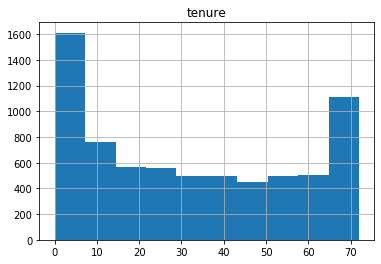

In [24]:
data.hist(["tenure"])

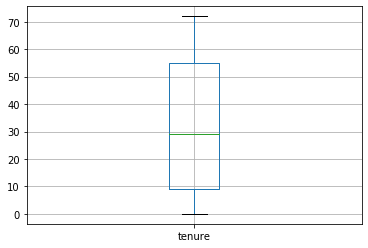

In [25]:
data.boxplot(["tenure"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000226B4333C08>]],
      dtype=object)

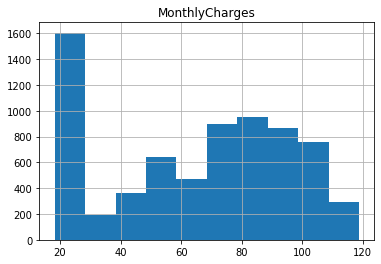

In [26]:
data.hist(["MonthlyCharges"])

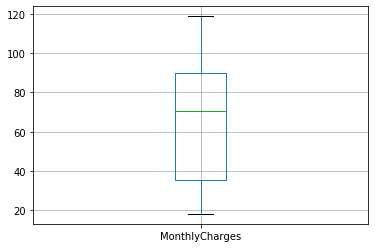

In [27]:
data.boxplot(["MonthlyCharges"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000226B3C03688>]],
      dtype=object)

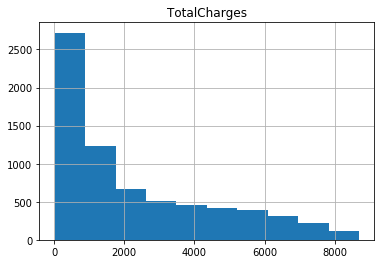

In [28]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'], errors='coerce')
data.hist(["TotalCharges"])

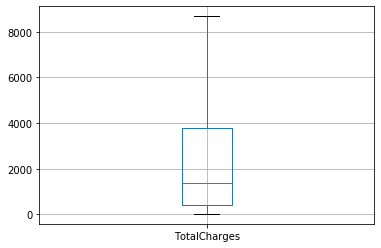

In [29]:
data.boxplot(["TotalCharges"])

### Summary Statics for Numeric Attribute

In [30]:
data_num = data.drop(["SeniorCitizen"], axis=1)
data_num.describe()

,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.765853,0.265370
std,24.559481,30.090047,2266.762876,0.441561
min,0.000000,18.250000,18.800000,0.000000
25%,9.000000,35.500000,398.550000,0.000000
50%,29.000000,70.350000,1394.550000,0.000000
75%,55.000000,89.850000,3786.600000,1.000000
max,72.000000,118.750000,8684.800000,1.000000


For tenure : The mean value is 32.37 i.e. on an average the value of tenure attribute is 32. Tenure is having the standerd deviation 24.55 which indicates the deviation of an observation from the mean. The value of Tenure attribute varies from 0 to 72. The 1st quartile is 9 i.e. 25% of the observations lies below 9. 3rd quartile is 55 which indicates that in 75% of the observations the value of Tenure is less than 55. The difference between 1st quartile and the minimum(9) is lesser than the difference between 3rd quartile and the maximum(17) which is showing that the data is more dispersed after the value 55. The difference between mean & median (3) is not significantly high but the difference between 3rd quartile & maximum made the distribution right skewed.

For MonthlyCharges : The mean value is 64.76 i.e. on an average the value of MonthlyCharge attribute is 65. MonthlyCharge is having the standerd deviation 30.09 which indicates the deviation of an observation from the mean. The value of MonthlyCharges attribute varies from 18.25 to 118.75. The 1st quartile is 35.5 i.e. 25% of the observations lies below 36. 3rd quartile is 89.85 which indicates that in 75% of the observations the value of MonthlyCharges is less than 89. The difference between 1st quartile and the minimum(17.25) is lesser than the difference between 3rd quartile and the maximum(28.9) which is showing that the data is more dispersed after the value 89. The difference between mean & median (5.59) is not significantly high but the difference between 3rd quartile & maximum made the distribution right skewed.

For TotalCharges : The mean value is 64.76 i.e. on an average the value of MonthlyCharge attribute is 65. MonthlyCharge is having the standerd deviation 30.09 which indicates the deviation of an observation from the mean. The value of MonthlyCharges attribute varies from 18.25 to 118.75. The 1st quartile is 35.5 i.e. 25% of the observations lies below 36. 3rd quartile is 89.85 which indicates that in 75% of the observations the value of MonthlyCharges is less than 89. The difference between 1st quartile and the minimum(17.25) is lesser than the difference between 3rd quartile and the maximum(28.9) which is showing that the data is more dispersed after the value 89. The difference between mean & median (5.59) is not significantly high but the difference between 3rd quartile & maximum made the distribution right skewed.

### Summary and count for categorical attribute

In [31]:
data.describe(include=["O"])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,8388-FYNPZ,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


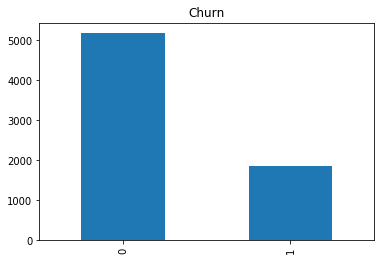

In [32]:
#Target variable
data['Churn'].value_counts().plot.bar(title="Churn")

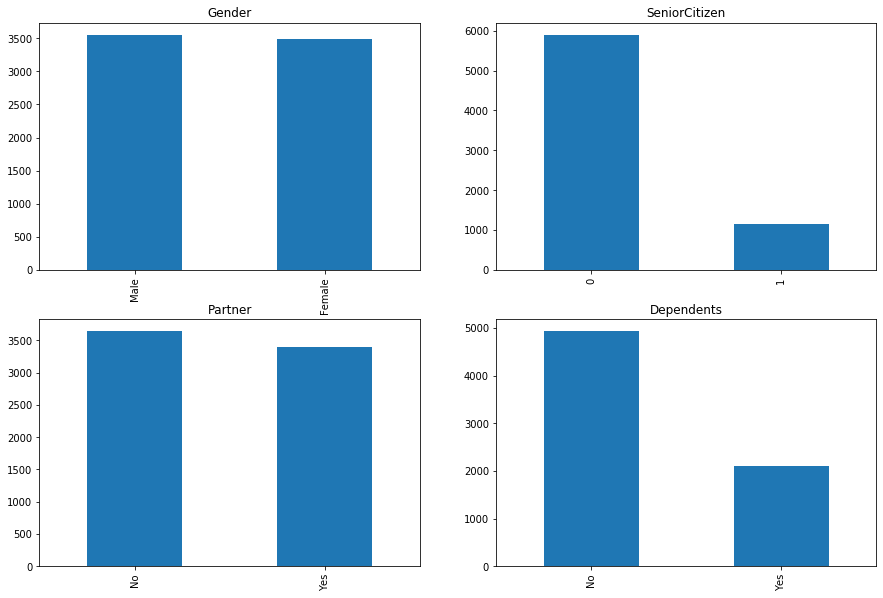

In [33]:
plt.figure(1)
plt.subplot(221)
data['gender'].value_counts().plot.bar(title="Gender",figsize=(15,10))
plt.subplot(222)
data['SeniorCitizen'].value_counts().plot.bar(title="SeniorCitizen")
plt.subplot(223)
data['Partner'].value_counts().plot.bar(title="Partner")
plt.subplot(224)
data['Dependents'].value_counts().plot.bar(title="Dependents")

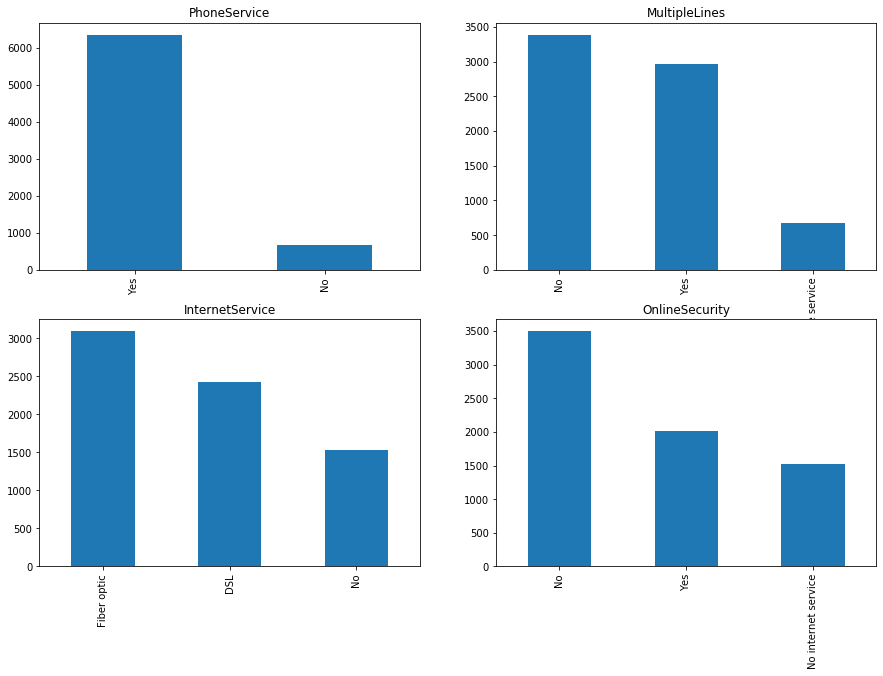

In [34]:
plt.figure(1)
plt.subplot(221)
data['PhoneService'].value_counts().plot.bar(title="PhoneService",figsize=(15,10))
plt.subplot(222)
data['MultipleLines'].value_counts().plot.bar(title="MultipleLines")
plt.subplot(223)
data['InternetService'].value_counts().plot.bar(title="InternetService")
plt.subplot(224)
data['OnlineSecurity'].value_counts().plot.bar(title="OnlineSecurity")

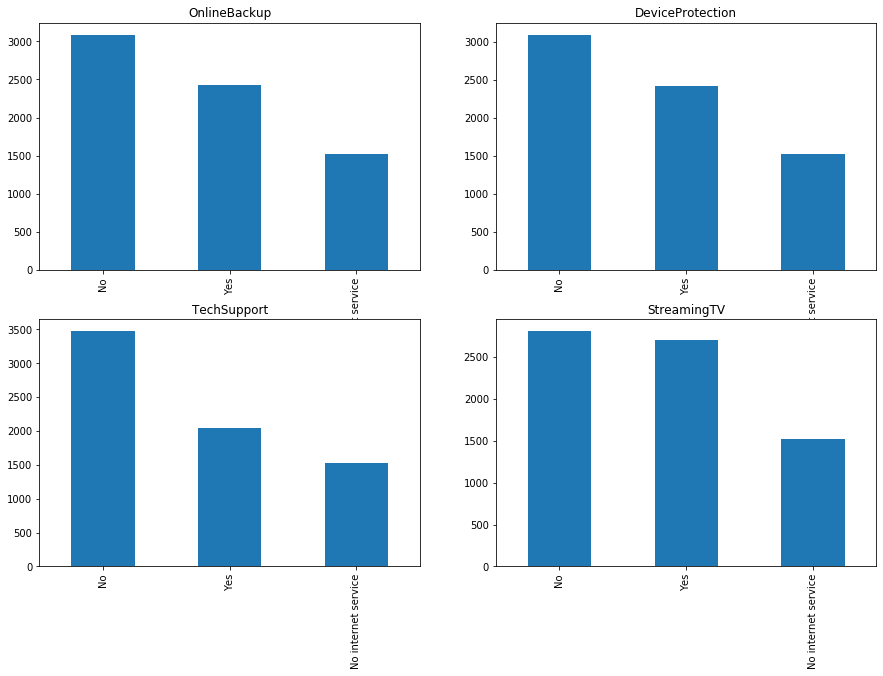

In [35]:
plt.figure(1)
plt.subplot(221)
data['OnlineBackup'].value_counts().plot.bar(title="OnlineBackup",figsize=(15,10))
plt.subplot(222)
data['DeviceProtection'].value_counts().plot.bar(title="DeviceProtection")
plt.subplot(223)
data['TechSupport'].value_counts().plot.bar(title="TechSupport")
plt.subplot(224)
data['StreamingTV'].value_counts().plot.bar(title="StreamingTV")

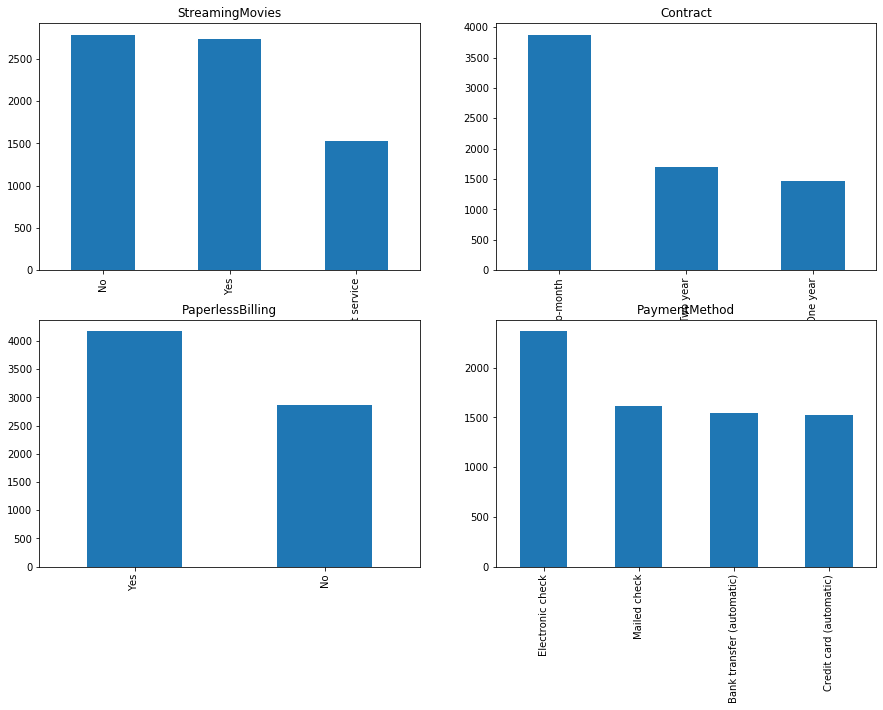

In [36]:
plt.figure(1)
plt.subplot(221)
data['StreamingMovies'].value_counts().plot.bar(title="StreamingMovies",figsize=(15,10))
plt.subplot(222)
data['Contract'].value_counts().plot.bar(title="Contract")
plt.subplot(223)
data['PaperlessBilling'].value_counts().plot.bar(title="PaperlessBilling")
plt.subplot(224)
data['PaymentMethod'].value_counts().plot.bar(title="PaymentMethod")

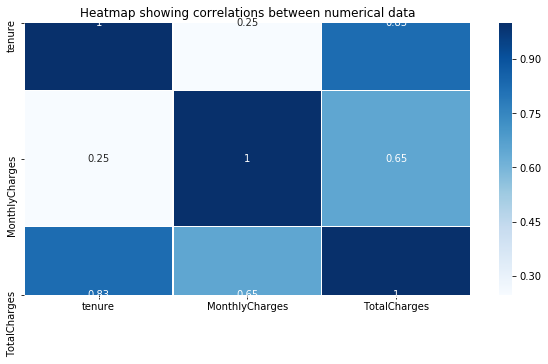

In [37]:
#Visualizing the correlations between numerical data
import seaborn as sns
plt.figure(figsize=(10,5))  
data_num = data.drop(["SeniorCitizen","Churn"], axis=1)
sns.heatmap(data_num.corr(),annot=True,linewidths=.3, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

The strongest correlation is present between Total Charges and Tenure with Coefficient 0.83 (which is greater than 0.75, it means that high positive correlation among them). There is moderate positive correlation (0.65) between Monthly Charges and Total Charges (which is between 0.75 and 0.3)

### 3.Encode Categorical Variables

Most of the algorithms in sklearn do not work on categorical data. We need to convert these variables into binary (yes / no) variables before applying the sklearn algorithms.

In [38]:
# Import module for OneHotEncoding
from sklearn.preprocessing import OneHotEncoder

In [39]:
data_new=data[["customerID","TotalCharges","MonthlyCharges","tenure","Churn"]]
#data_new['TotalCharges'] = data['TotalCharges'].astype(float)
Categorical = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
for feature in Categorical:
    data_new = pd.concat([data_new, pd.get_dummies(data[feature], prefix=[feature])], axis=1)

In [40]:
data_new.head(3)

,customerID,TotalCharges,MonthlyCharges,tenure,Churn,['gender']_Female,['gender']_Male,['SeniorCitizen']_0,['SeniorCitizen']_1,['Partner']_No,...,['StreamingMovies']_Yes,['Contract']_Month-to-month,['Contract']_One year,['Contract']_Two year,['PaperlessBilling']_No,['PaperlessBilling']_Yes,['PaymentMethod']_Bank transfer (automatic),['PaymentMethod']_Credit card (automatic),['PaymentMethod']_Electronic check,['PaymentMethod']_Mailed check
0,7590-VHVEG,29.85,29.85,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,1889.50,56.95,34,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,108.15,53.85,2,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1


In [41]:
#setting dependent and independent variable
X = data_new.drop(['Churn','customerID'], axis=1)
Y = data_new['Churn']
X.head()

,TotalCharges,MonthlyCharges,tenure,['gender']_Female,['gender']_Male,['SeniorCitizen']_0,['SeniorCitizen']_1,['Partner']_No,['Partner']_Yes,['Dependents']_No,...,['StreamingMovies']_Yes,['Contract']_Month-to-month,['Contract']_One year,['Contract']_Two year,['PaperlessBilling']_No,['PaperlessBilling']_Yes,['PaymentMethod']_Bank transfer (automatic),['PaymentMethod']_Credit card (automatic),['PaymentMethod']_Electronic check,['PaymentMethod']_Mailed check
0,29.85,29.85,1,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,1889.50,56.95,34,0,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,108.15,53.85,2,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,1840.75,42.30,45,0,1,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,151.65,70.70,2,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


### 4.Feature Selection

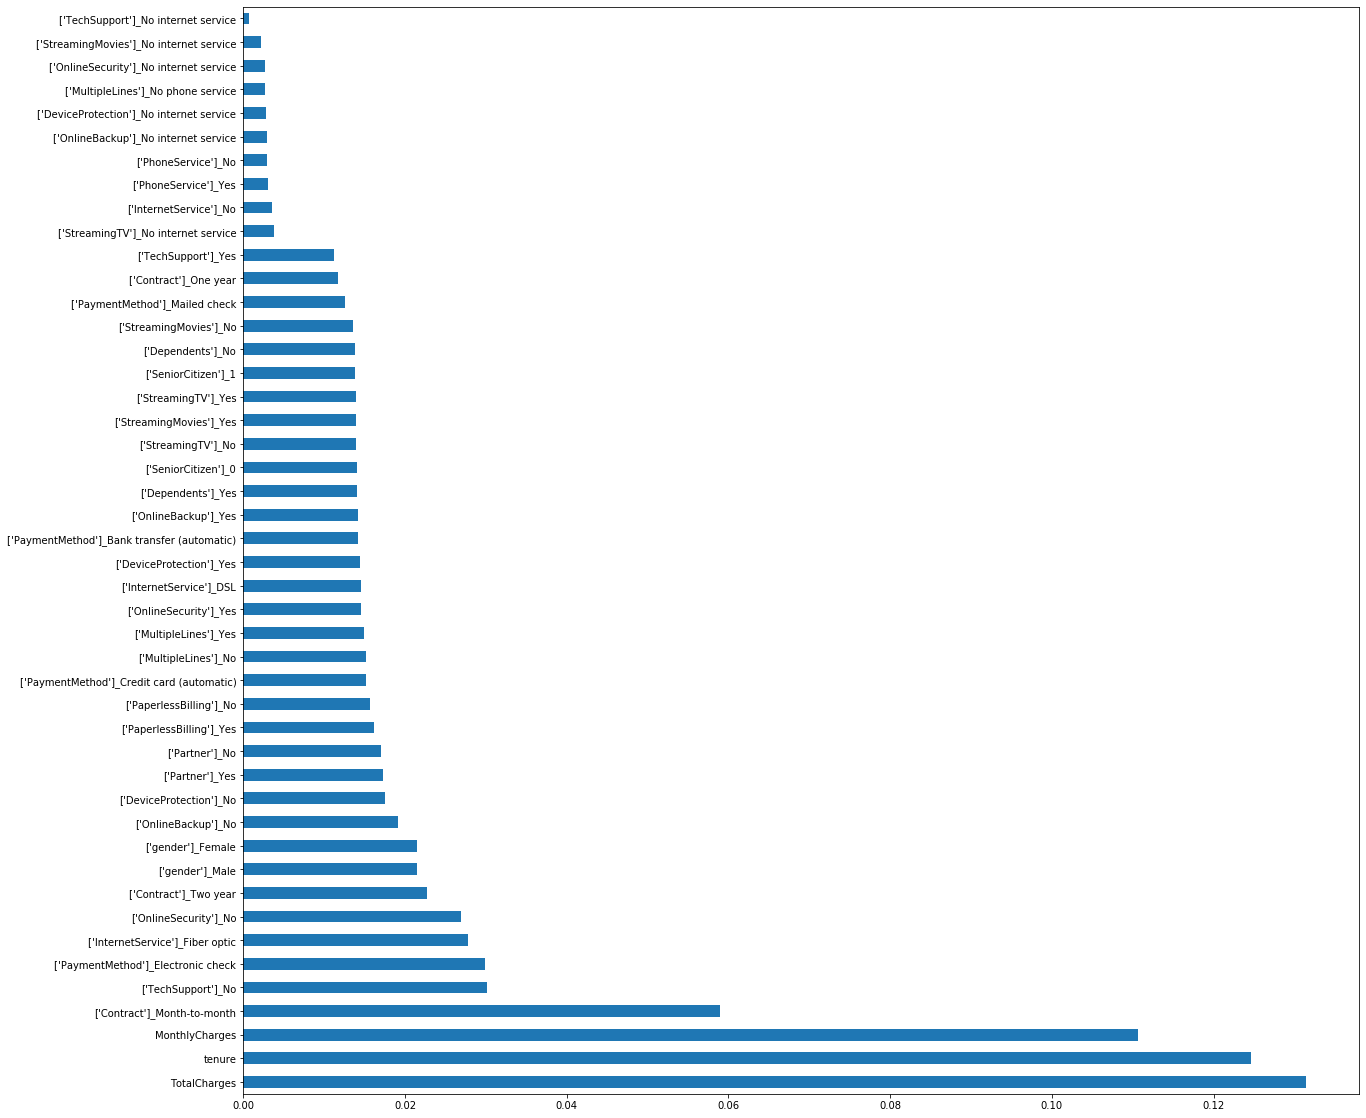

In [42]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns[0:len(model.feature_importances_)])
feat_importances.nlargest(46).plot(kind='barh',figsize=(20,20))
plt.show()

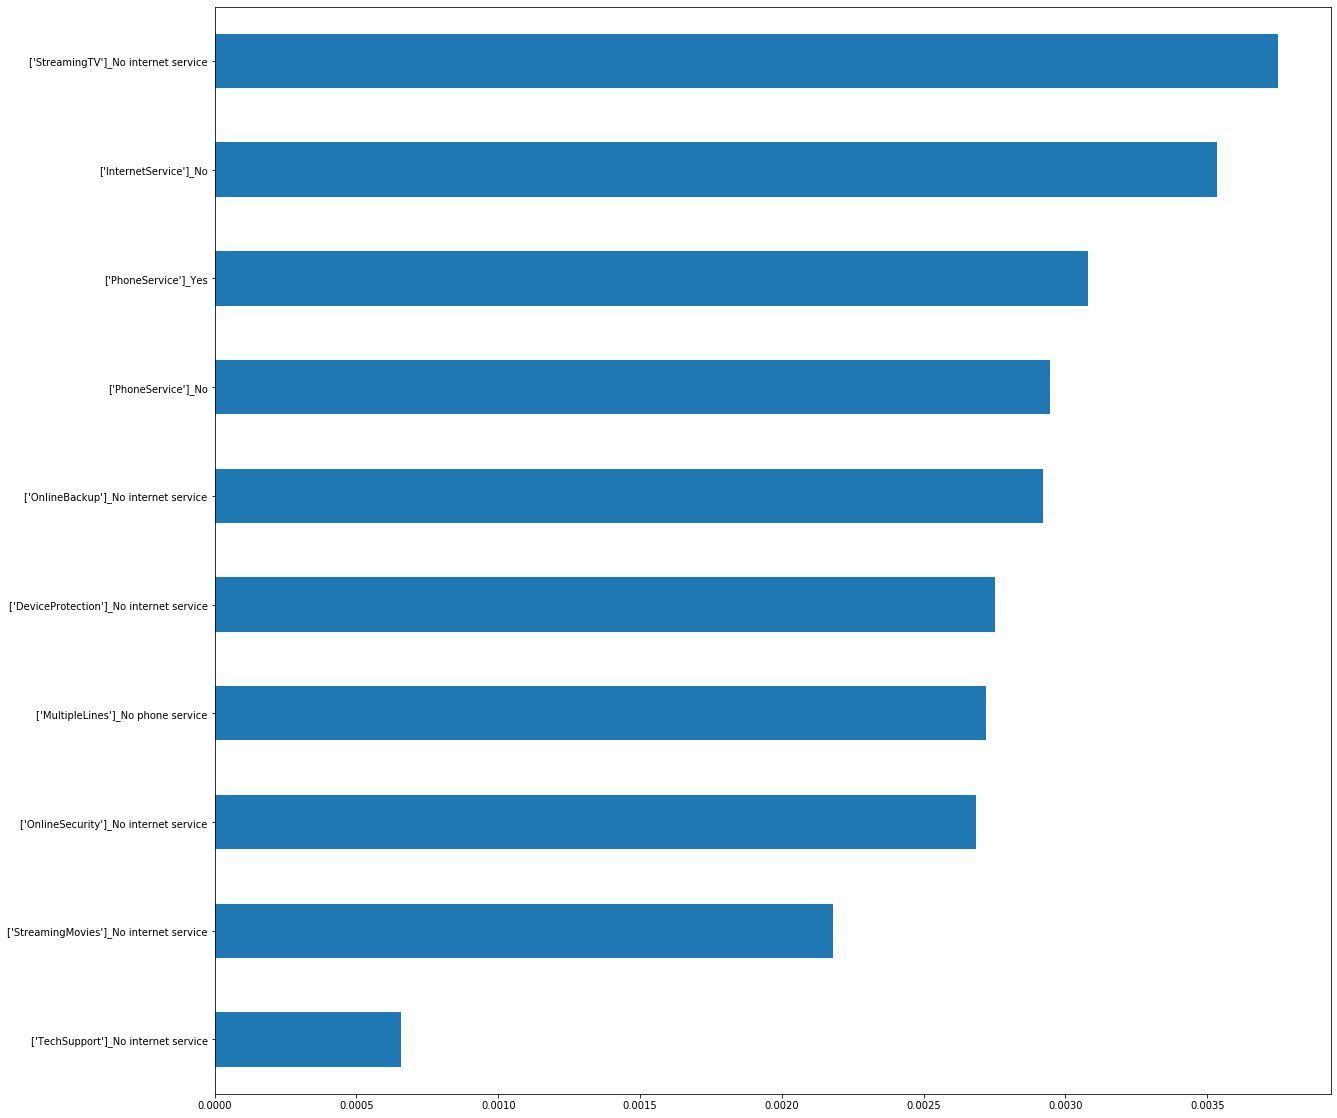

In [43]:
feat_importances.nsmallest(10).plot(kind='barh',figsize=(20,20))
plt.show()

#### Train and Test Data

In [45]:
#Test data and Train data 
#Splitting the train data and test data in 80/20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

## 5.Normalization

In [47]:
#PreProcessing - Scaling
#Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [48]:
X_train.head(3)

,TotalCharges,MonthlyCharges,tenure,['gender']_Female,['gender']_Male,['SeniorCitizen']_0,['SeniorCitizen']_1,['Partner']_No,['Partner']_Yes,['Dependents']_No,...,['StreamingMovies']_Yes,['Contract']_Month-to-month,['Contract']_One year,['Contract']_Two year,['PaperlessBilling']_No,['PaperlessBilling']_Yes,['PaymentMethod']_Bank transfer (automatic),['PaymentMethod']_Credit card (automatic),['PaymentMethod']_Electronic check,['PaymentMethod']_Mailed check
0,1.704770,0.674154,1.612532,1.0,-1.0,0.439763,-0.439763,-1.032476,1.032476,0.653215,...,1.253566,-1.111228,-0.516093,1.793618,1.214659,-1.214659,-0.531228,-0.518574,-0.712196,1.822238
1,-0.709792,-0.614894,-0.747907,1.0,-1.0,-2.273954,2.273954,0.968546,-0.968546,0.653215,...,1.253566,0.899905,-0.516093,-0.557532,-0.823277,0.823277,-0.531228,-0.518574,1.404108,-0.548776
2,-0.208687,-1.335097,1.571835,1.0,-1.0,0.439763,-0.439763,-1.032476,1.032476,-1.530889,...,-0.797724,-1.111228,-0.516093,1.793618,1.214659,-1.214659,1.882432,-0.518574,-0.712196,-0.548776


# Decision Tree Implementation

Apply Decision Tree algorithm to X and Y variables. Also measure the accuracy of the model. Try out different settings (for e.g. depth of the tree) to improve prediction accuracy while controlling the depth to manageable level.

## 6.Apply Decision tree

We applied Decision Tree algorithm to the data.

In order to optimize the Decision Tree solution, we carried out the following steps


Use different entropy measures like Information Gain and Gini Index
Run the algorithm with different combinations of variables
Experiment with 'max_depth' to improve model accuracy and at the same time, avoid overfitting.

In [51]:
# Import additional libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, classification_report, f1_score
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression

In [54]:
# Create the Decision Tree Classifier Object
dclassifier = DecisionTreeClassifier()
dclassifier = DecisionTreeClassifier(max_depth=6, criterion='gini')    # slightly lower accuracy, hence rejected
dclassifier = DecisionTreeClassifier(max_depth=6, criterion='entropy')   # Accuracy gain after depth 6 minimal
# Train the Decision Tree Classifier
dclassifier = dclassifier.fit(X_train, y_train)
dclassifier.score(X_test, y_test)

0.78708303761533

In [55]:
# Predict y values
y_pred_d = dclassifier.predict(X_test)

In [56]:
print(confusion_matrix(y_test, y_pred_d))

[[922 119]
 [181 187]]


In [57]:
# Accuracy Measures
print(classification_report(y_test, y_pred_d))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1041
           1       0.61      0.51      0.55       368

    accuracy                           0.79      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [58]:
# F1 Score
f1_score(y_test, y_pred_d, average="micro")

0.78708303761533

In [60]:
# Check for model overfitting by predicting Y in training dataset
y_pred_d_tr = dclassifier.predict(X_train)            # Predict Y in training dataset and create its report
print(classification_report(y_train, y_pred_d_tr))
f1_score(y_train, y_pred_d_tr, average="micro")

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4133
           1       0.68      0.55      0.61      1501

    accuracy                           0.81      5634
   macro avg       0.76      0.73      0.74      5634
weighted avg       0.80      0.81      0.80      5634



0.8102591409300675

The accuracy of the 'Decision Tree' model is 78.71% on test dataset.

To check if the model is an over / under-fit, we predicted Y (i.e. Classification variable) in the Training dataset using the predictor. The accuracy of the model on Training dataset is 81.02%.

Thus, we conclude that the model is neither overfit nor underfit.

## 7. Visualize Decision Tree

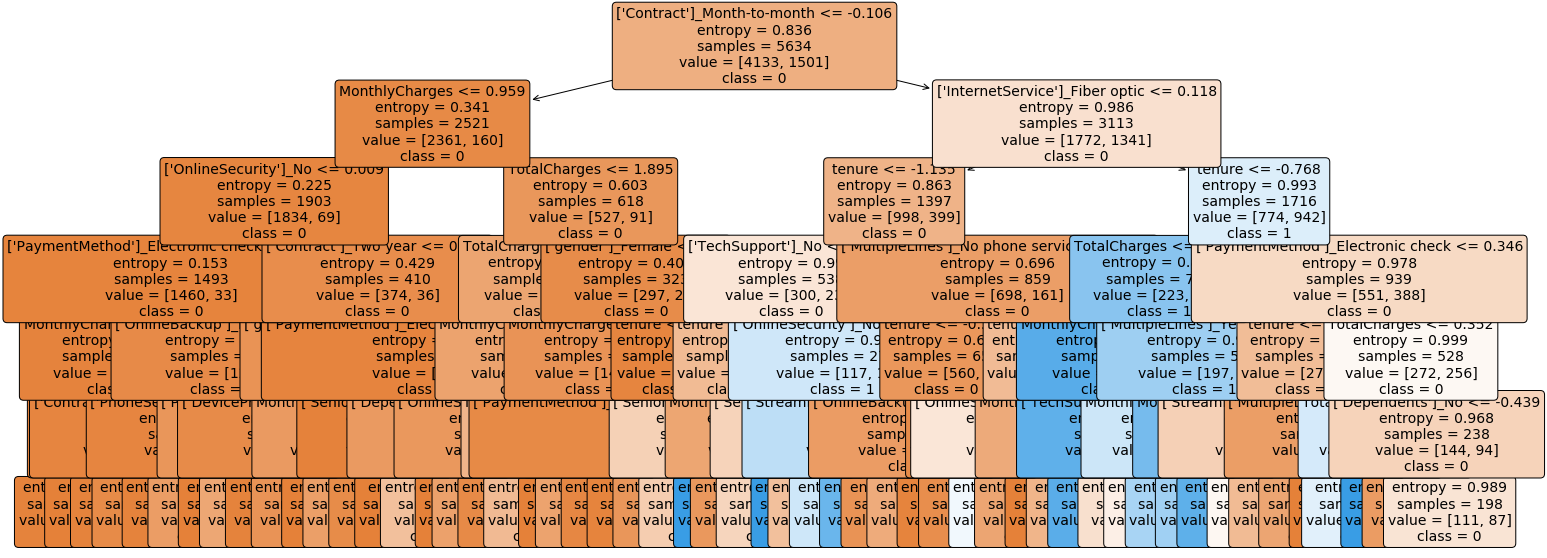

In [62]:
plt.figure(figsize=(25,10))
a = plot_tree(dclassifier,feature_names = X.columns,class_names=['0','1'],
              filled=True, 
              rounded=True, 
              fontsize=14)
plt.savefig("decisiontree.png")

# Logistic Regression Implementation

Apply Logistic Regression model to training dataset and test its accuracy on test dataset.

## 8. Apply Logistic Regression model

In [63]:
# Create an instance of LogisticRegression
lclassifier = LogisticRegression(max_iter=250) # Needed to increase max_iter for convergence

In [64]:
# Train the model using the training sets
lclassifier.fit(X_train, y_train)
# nclassifier.score(x_train, y_train)
lclassifier.score(X_test, y_test)

0.7984386089425124

In [66]:
y_pred_l = lclassifier.predict(X_test)
print(confusion_matrix(y_test, y_pred_l))

[[932 109]
 [175 193]]


In [67]:
# Accuracy Measures
print(classification_report(y_test, y_pred_l))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1041
           1       0.64      0.52      0.58       368

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [68]:
# F1 Score
f1_score(y_test, y_pred_l, average="micro")

0.7984386089425124

In [70]:
# Check for model overfitting by predicting Y in training dataset
y_pred_l_tr = lclassifier.predict(X_train)            # Predict Y in training dataset and create its report
print(classification_report(y_train, y_pred_l_tr))
f1_score(y_train, y_pred_l_tr, average="micro")

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4133
           1       0.66      0.57      0.61      1501

    accuracy                           0.81      5634
   macro avg       0.76      0.73      0.74      5634
weighted avg       0.80      0.81      0.80      5634



0.8081292154774583

The accuracy of the 'Logistic Regression' model is 79.84% on test dataset.

To check if the model is an over / under-fit, we predicted Y (i.e. Classification variable) in the Training dataset using the predictor. The accuracy of the model on Training dataset is 80.81%.

Thus, we conclude that the model is neither overfit nor underfit.

# Naive Bayes Implementation

Apply Naive Bayes model on training dataset and test its accuracy on test dataset.

## 9. Apply Naive Bayes model

In [72]:
from sklearn.naive_bayes import GaussianNB  # naive Bayes
nclassifier = GaussianNB()
# Train the model using the training sets
nclassifier.fit(X_train, y_train)
# nclassifier.score(x_train, y_train)
nclassifier.score(X_test, y_test)

0.6912704045422285

In [73]:
y_pred_n = nclassifier.predict(X_test)

In [74]:
print(confusion_matrix(y_test, y_pred_n))

[[669 372]
 [ 63 305]]


In [75]:
# Accuracy Measures
print(classification_report(y_test, y_pred_n))

              precision    recall  f1-score   support

           0       0.91      0.64      0.75      1041
           1       0.45      0.83      0.58       368

    accuracy                           0.69      1409
   macro avg       0.68      0.74      0.67      1409
weighted avg       0.79      0.69      0.71      1409



In [76]:
# F1 Score
f1_score(y_test, y_pred_n, average="micro")

0.6912704045422285

In [78]:
# Check for model overfitting by predicting Y in training dataset
y_pred_n_tr = nclassifier.predict(X_train)            # Predict Y in training dataset and create its report
print(classification_report(y_train, y_pred_n_tr))
f1_score(y_train, y_pred_n_tr, average="micro")

              precision    recall  f1-score   support

           0       0.92      0.66      0.77      4133
           1       0.47      0.84      0.60      1501

    accuracy                           0.71      5634
   macro avg       0.70      0.75      0.69      5634
weighted avg       0.80      0.71      0.72      5634



0.7071352502662406

The accuracy of the 'Naive Bayes' model is 69.12% on test dataset.

To check if the model is an over / under-fit, we predicted Y (i.e. Classification variable) in the Training dataset using the predictor. The accuracy of the model on Training dataset is 70.71%.

Thus, we conclude that the model is neither overfit nor underfit.

## 10.Compare Accuracy of Various Models

The accuracy of the three models applied (F-Score) is given below

A) Decision Tree: 0.7871

B) Logistic Regression: 0.7984

C) Naive Bayes: 0.6912

We checked for model overfitting / underfitting for all the three models and found that the models fit appropriately to the data.

## 11.Recommended Model

We recommend Logistic Regression Model for classification of the dataset into Churn-yes and Churn-no